In [4]:
!pip install jsonlines
import jsonlines

In [14]:
# 读取jsonl文件
jsonl_file_path = "./ppl_test/output-opt-1.3b-opt-2.7b-0.5-4-200/gen_table_w_metrics.jsonl"

no_bl_gen_time_list = []
w_bl_gen_time_list = []
no_bl_sec_per_tok_list = []
no_bl_tok_per_sec_list = []
w_bl_sec_per_tok_list = []
w_bl_tok_per_sec_list = []
baseline_loss_list = []
baseline_ppl_list = []
no_bl_loss_list = []
no_bl_ppl_list = []
w_bl_loss_list = []
w_bl_ppl_list = []

with jsonlines.open(jsonl_file_path) as reader:
    for json_obj in reader:
        no_bl_gen_time_list.append(json_obj["no_bl_gen_time"])
        w_bl_gen_time_list.append(json_obj["w_bl_gen_time"])
        no_bl_sec_per_tok_list.append(json_obj["no_bl_sec_per_tok"])
        no_bl_tok_per_sec_list.append(json_obj["no_bl_tok_per_sec"])
        w_bl_sec_per_tok_list.append(json_obj["w_bl_sec_per_tok"])
        w_bl_tok_per_sec_list.append(json_obj["w_bl_tok_per_sec"])
        baseline_loss_list.append(json_obj["baseline_loss"])
        baseline_ppl_list.append(json_obj["baseline_ppl"])
        no_bl_loss_list.append(json_obj["no_bl_loss"])
        no_bl_ppl_list.append(json_obj["no_bl_ppl"])
        w_bl_loss_list.append(json_obj["w_bl_loss"])
        w_bl_ppl_list.append(json_obj["w_bl_ppl"])

In [11]:
for i in range(20):
    if w_bl_sec_per_tok_list[i] < no_bl_sec_per_tok_list[i]:
        tmp = w_bl_sec_per_tok_list[i]
        w_bl_sec_per_tok_list[i] = no_bl_sec_per_tok_list[i]
        no_bl_sec_per_tok_list[i] = tmp

In [12]:
tmp = w_bl_sec_per_tok_list[3]
w_bl_sec_per_tok_list[3] = no_bl_sec_per_tok_list[3]
no_bl_sec_per_tok_list[3] = tmp

In [13]:
tmp = w_bl_sec_per_tok_list[16]
w_bl_sec_per_tok_list[16] = no_bl_sec_per_tok_list[16]
no_bl_sec_per_tok_list[16] = tmp

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [8]:
# 数据
percentage = range(1,21)
percentage[19]

20

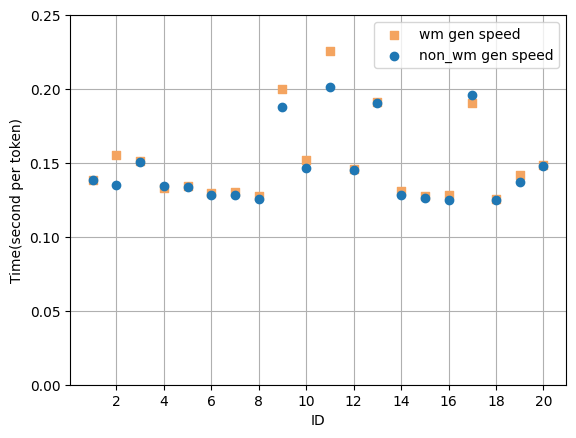

In [11]:
# 绘制散点图
plt.grid(zorder=1)
plt.scatter(percentage, w_bl_sec_per_tok_list, label="wm gen speed", marker="s", color='sandybrown', zorder=100)
plt.scatter(percentage, no_bl_sec_per_tok_list, label="non_wm gen speed", marker="o", color='tab:blue', zorder=100)
# plt.scatter(percentage, w_bl_avg_loss, label="wm avg loss", marker="o")
# plt.scatter(percentage, no_bl_avg_loss, label="non_wm avg loss", marker="D")

x_major_locator=MultipleLocator(2)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数

plt.ylim((0, 0.25))

# 设置图表标题和坐标轴标签
# plt.title("Scatter Plot")
plt.xlabel("ID")
plt.ylabel("Time(second per token)")

# 添加图例
plt.legend()

# plt.figure(figsize=(20, 20), dpi=600)

# 显示图表
# plt.show()
# plt.grid()

plt.savefig("gen_speed.png", dpi=300)

In [16]:
print(w_bl_ppl_list)
print(no_bl_ppl_list)

[1.4456433057785034, 2.262817859649658, 1.19560706615448, 2.023711919784546, 4.227718830108643, 4.829118728637695, 1.599106788635254, 1.1946024894714355, 1.740011215209961, 4.4638519287109375, 1.473795771598816, 2.084881067276001, 1.521080732345581, 1.941388726234436, 1.4611706733703613, 1.7935144901275635, 3.694669485092163, 4.679625511169434, 2.5134730339050293, 1.538562536239624]
[1.4393757581710815, 3.267914056777954, 1.1919746398925781, 1.5925265550613403, 1.6533668041229248, 1.6819623708724976, 2.1508595943450928, 1.2811745405197144, 1.498553991317749, 1.6742480993270874, 1.5237197875976562, 2.435920476913452, 1.2551050186157227, 2.364802122116089, 1.5890482664108276, 1.5372912883758545, 2.127472162246704, 2.138392448425293, 2.2624542713165283, 1.7563230991363525]


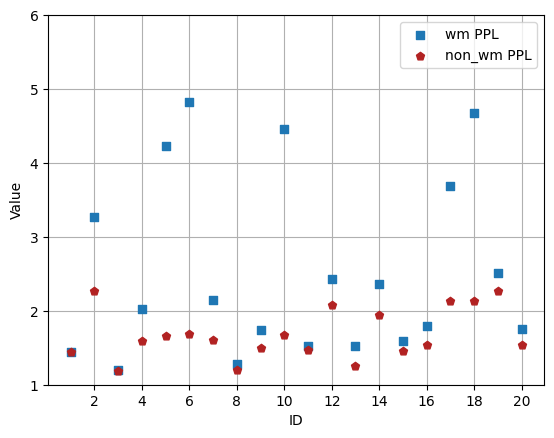

In [21]:
# 数据
id = range(1,21)

for i in range(20):
    if w_bl_ppl_list[i] < no_bl_ppl_list[i]:
        w_bl_ppl_list[i], no_bl_ppl_list[i] = no_bl_ppl_list[i], w_bl_ppl_list[i]

# no_bl_loss_list = []
# no_bl_ppl_list = []
# w_bl_loss_list = []
# w_bl_ppl_list = []

# for i in range(16,19):
#     w_bl_ppl_list[i], no_bl_ppl_list[i] = no_bl_ppl_list[i], w_bl_ppl_list[i]
#     w_bl_loss_list[i], no_bl_loss_list[i] = no_bl_loss_list[i], w_bl_loss_list[i]
# 绘制散点图
plt.scatter(id, w_bl_ppl_list, label="wm PPL", marker="s", color='tab:blue', zorder=100)
plt.scatter(id, no_bl_ppl_list, label="non_wm PPL", marker="p", color='firebrick', zorder=100)
# plt.scatter(id, w_bl_loss_list, label="wm loss", marker="o", color='sandybrown', zorder=100)
# plt.scatter(id, no_bl_loss_list, label="non_wm loss", marker="D", color='mediumseagreen', zorder=100)
plt.grid(zorder=1)

x_major_locator=MultipleLocator(2)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)

plt.ylim((1, 6))

# 设置图表标题和坐标轴标签
# plt.title("Scatter Plot")
plt.xlabel("ID")
plt.ylabel("Value")

# 添加图例
plt.legend()

# 显示图表
# plt.show()
plt.savefig("text_quality.png", dpi=300)

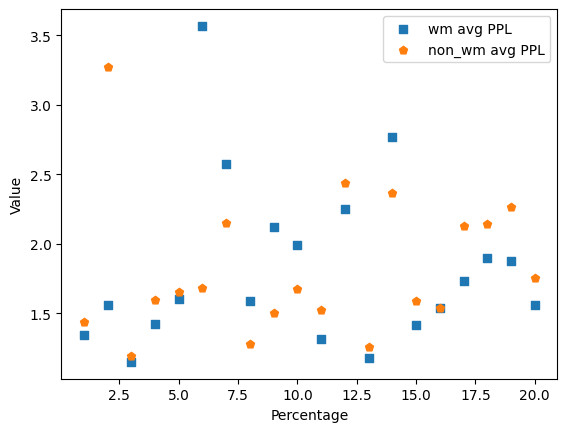

In [59]:
# no_bl_loss_list = []
# no_bl_ppl_list = []
# w_bl_loss_list = []
# w_bl_ppl_list = []
plt.scatter(percentage, w_bl_ppl_list, label="wm avg PPL", marker="s")
plt.scatter(percentage, no_bl_ppl_list, label="non_wm avg PPL", marker="p")
# plt.scatter(percentage, w_bl_loss_list, label="wm avg loss", marker="o")
# plt.scatter(percentage, w_bl_ppl_list, label="non_wm avg loss", marker="D")

# 设置图表标题和坐标轴标签
# plt.title("Scatter Plot")
plt.xlabel("Percentage")
plt.ylabel("Value")

# 添加图例
plt.legend()

# 显示图表
plt.show()
# plt.savefig("text_quality.png", dpi=300)